In [4]:
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [7]:
fair_probs = torch.ones(6) / 6
multinomial.Multinomial(10, fair_probs).sample()

tensor([1., 1., 2., 1., 3., 2.])

In [14]:
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000

tensor([0.1750, 0.1550, 0.1790, 0.1550, 0.1670, 0.1690])

counts: tensor([[3., 1., 1., 3., 1., 1.],
        [0., 1., 4., 1., 2., 2.],
        [1., 1., 3., 3., 1., 1.],
        ...,
        [2., 1., 0., 2., 3., 2.],
        [0., 3., 3., 2., 2., 0.],
        [1., 1., 3., 2., 2., 1.]])
cum_counts: tensor([[  3.,   1.,   1.,   3.,   1.,   1.],
        [  3.,   2.,   5.,   4.,   3.,   3.],
        [  4.,   3.,   8.,   7.,   4.,   4.],
        ...,
        [838., 870., 854., 819., 791., 808.],
        [838., 873., 857., 821., 793., 808.],
        [839., 874., 860., 823., 795., 809.]])
estimate: tensor([[0.3000, 0.1000, 0.1000, 0.3000, 0.1000, 0.1000],
        [0.1500, 0.1000, 0.2500, 0.2000, 0.1500, 0.1500],
        [0.1333, 0.1000, 0.2667, 0.2333, 0.1333, 0.1333],
        ...,
        [0.1683, 0.1747, 0.1715, 0.1645, 0.1588, 0.1622],
        [0.1679, 0.1749, 0.1717, 0.1645, 0.1589, 0.1619],
        [0.1678, 0.1748, 0.1720, 0.1646, 0.1590, 0.1618]])


/home/qiurong/venv/d2l-zh/lib/python3.6/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/qiurong/venv/d2l-zh/lib/python3.6/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 39564 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/qiurong/venv/d2l-zh/lib/python3.6/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 27425 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/qiurong/venv/d2l-zh/lib/python3.6/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/qiurong/venv/d2l-zh/lib/python3.6/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 20272 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/qiurong/venv/d2l-zh/lib/python3.6/site-packages/matplotlib/textpath.py:74: Runt

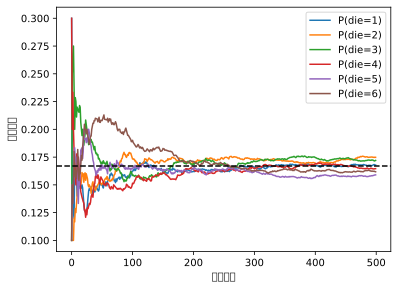

In [27]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
print("counts:", counts)
cum_counts = counts.cumsum(dim=0)
print("cum_counts:", cum_counts)
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)
print("estimates:", estimates)
d2l.set_figsize((6, 4.5))     
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
            label=("P(die={})".format(str(i + 1))))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('实验次数')
d2l.plt.gca().set_ylabel('估算概率')
d2l.plt.legend()

## 查阅文档

In [28]:
# 查看类
import torch
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weibull', '__all__', '__builtins__', '__cached__', '__doc__'

In [29]:
# 查看特定函数
help(torch.ones)

Help on built-in function ones:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None``, uses the cur

In [33]:
list?